In [2]:
import pyusbus as usbProbe

import pandas as pd
import numpy as np
import struct

from IPython import display
import matplotlib.pyplot as plt
%matplotlib inline

print("pyubus version:",usbProbe.__version__)

pyubus version: 0.0.2


# Release of v0.0.1

Testing with the Healson UP20 linear probe.

# Testing if acq works

In [3]:
probe = usbProbe.UP20()

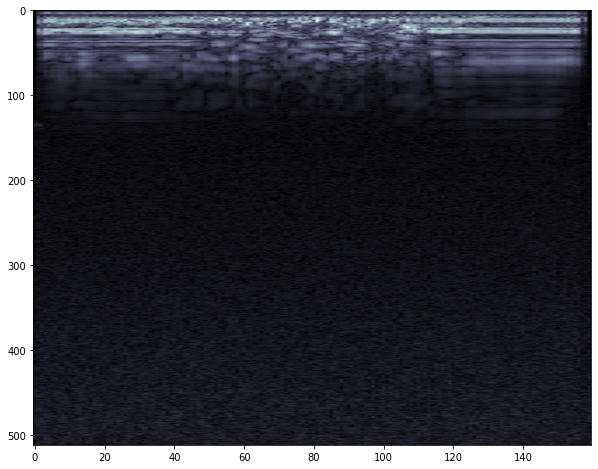

In [4]:
plt.figure(figsize=(10,8)) 
plt.imshow(np.sqrt(probe.getImages(n=2)[0]),cmap=plt.cm.bone, aspect='auto')

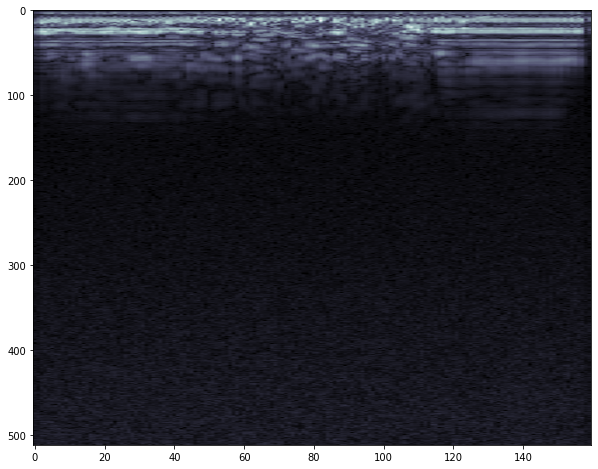

In [6]:
probe.unfreeze()
IMG = []
k = 0
while k < 40:
    tple = struct.unpack( '<2048H', probe.device.bulk_read(0x86,4096) ) 
    my_array = np.array( tple, dtype=np.int )
    IMG.append(my_array)
    k += 1
NPts =np.shape(IMG)[0]*np.shape(IMG)[1]
IMG = np.array( IMG, dtype=np.int )
IMG = IMG.reshape((NPts//160, 160))

plt.figure(figsize=(10,8)) 
plt.imshow(np.sqrt(IMG),cmap=plt.cm.bone, aspect='auto')

330

In [7]:
while(0): # to correct, of course

    frame = np.sqrt(probe.getImages(n=2)[0])
    # Display the frame
    plt.figure(figsize=(5,5))
    plt.imshow(frame, aspect='auto',cmap=plt.cm.bone)

    plt.axis('off') 
    plt.title("Probe")
    plt.show() 
    display.clear_output(wait=True)


# Result :

![](images/first.gif)

# Exploring readable registers

In [18]:
HEADER = "Unit"
for k in range(16):
    HEADER+= " "+str(k).rjust(4, ' ')
print(HEADER)
for k in range(16):
    LIGNE = str(k).rjust(4, ' ')
    for j in range(16):
        RES = probe.checkAddress(bytearray([16*k+j]))[0]
        LIGNE+= " "+str(RES).rjust(4, ' ')
    print(LIGNE)

Unit    0    1    2    3    4    5    6    7    8    9   10   11   12   13   14   15
   0   19    6    5   10    0    8   72   83   83   83   83   83   83   83    0    0
   1    8    1    1    1    1    1    0    1    1    1    6    0    0    0    0    0
   2    4    0    0  224    1  223    1   25    0  124    1  233    9    9    9    9
   3    9    9    9    9    9    9    9    9    9    9    9    9    9    9    9    9
   4   11    1    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   5    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   6    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   7    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   8    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
   9    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0
  10    0    0    0    0    0    0    0    0    0    0    0    0 